# Importance sampling

In [1]:
%matplotlib notebook

import numpy as np
import scipy
import scipy.stats

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
np.random.seed(42)

The goal of importance sampling is to reduce the variance of the approximation error made when approximating an expected value with Monte Carlo integration.

## Problem

Given a function $f(X)$ with a random variable $X$ coming from a distribution $p$: $X \sim p$. Approximate the expected value $\mathop{\mathbb{E}}(f(X))$ by sampling from $p$:

$$\mathop{\mathbb{E}}(f(X)) = \frac{1}{n} \sum_{i=1}^{n} f(X_i) \quad X_i \sim p$$

However, what if we can't sample efficiently from the true distribution $p$?

However if we can sample effeciently from an approximating distribution $q$ we can aproximate $\mathop{\mathbb{E}}(f(X))$ and even get a better estimator than sampling from the true distribution $p$.

## Solution

If $p$ and $q$ are densities we can write:

$$\mathop{\mathbb{E}}(f(X)) =
\int f(x)p(x)dx =
\int f(x)\frac{p(x)}{q(x)}q(x)dx$$

With the constraint that if $q(x) = 0$ than $p(x) = 0$.

We can approximate this by:

$$\mathop{\mathbb{E}}(f(X)) \approx \frac{1}{n} \sum_{i=1}^{n} f(X_i) \frac{p(X_i)}{q(X_i)} \quad X_i \sim q$$

Which is the importance sampling trick where our importance weights can be written as $w(x) = \frac{p(x)}{q(x)}$ and we approximate:

$$\mathop{\mathbb{E}}(f(X)) \approx \frac{1}{n} \sum_{i=1}^{n} f(X_i) w(X_i) \quad X_i \sim q$$

 
## Algorithm

1. Draw $n$ samples from $q$
2. Calculate the probability $q(x)$ of each sample
3. Evaluate $p$ over the $n$ samples
4. Calculate the importance weights $w = \frac{p}{q}$
5. Draw $n$ samples from $p$ with new weights $w$

<IPython.core.display.Javascript object>


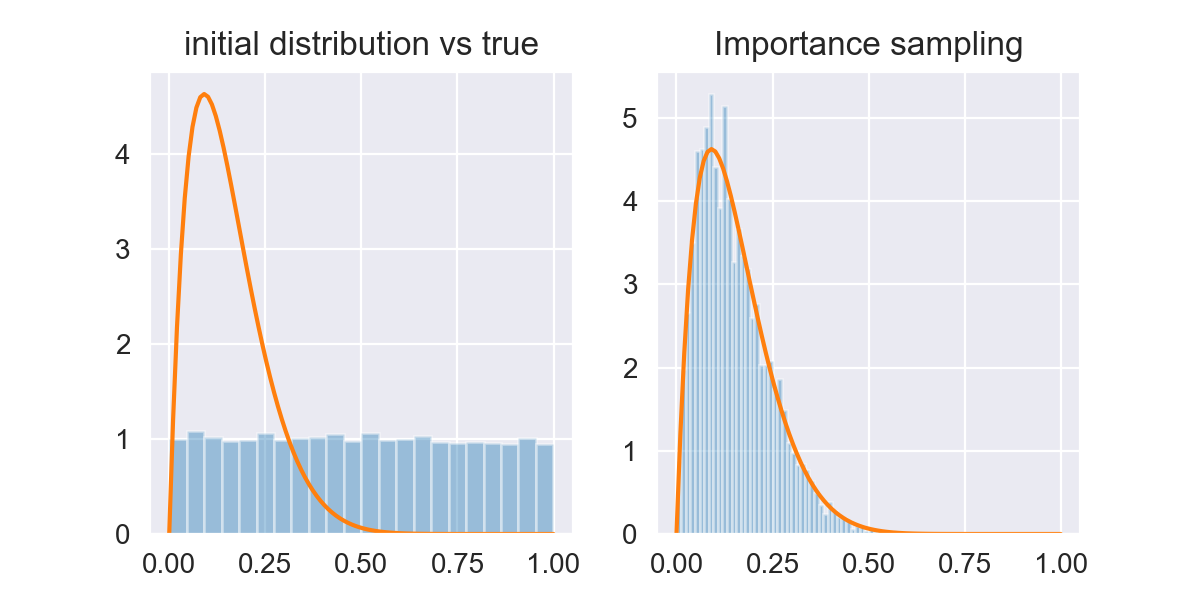

/home/peter/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [2]:
nb_samples = 10000
target_pdf = lambda x: scipy.stats.beta.pdf(x, 2, 11)

# 1. Draw n samples x from uniform distribution (q)
samples_uniform = scipy.stats.uniform.rvs(size=nb_samples)
# 2. Calculate the probability q(x) of each sample 
samples_uniform_weight = 1. / nb_samples
# 3. Evaluate p(x) over the n samples
target_pdf_eval = target_pdf(samples_uniform)
# 4. Calculate the importance weights w = p / q
importance_weight = target_pdf_eval / samples_uniform_weight
importance_weight /= sum(importance_weight)
# 5. Draw n samples from p with new weights w
target_samples = np.random.choice(
    samples_uniform, 
    size=nb_samples,
    replace=True,
    p=importance_weight
)


# Plot
x = np.linspace(0, 1, 100)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 3))
sns.distplot(
    samples_uniform, 
    norm_hist=True, kde=False, rug=False, ax=ax1)
ax1.plot(x, target_pdf(x), label='True distribution')
ax1.set_title('initial distribution vs true')

sns.distplot(
    target_samples,  
    norm_hist=True, kde=False, rug=False, ax=ax2)
ax2.plot(x, target_pdf(x), label='True distribution')
ax2.set_title('Importance sampling')
plt.show()

## Sources

* [Machine learning - Importance sampling and MCMC I - Nando de Freitas](https://www.youtube.com/watch?v=TNZk8lo4e-Q)
* [StatLect - The Monte Carlo method](https://www.statlect.com/asymptotic-theory/Monte-Carlo-method)
* [StatLect - Importance sampling](https://www.statlect.com/asymptotic-theory/importance-sampling)
* [Wikipedia - Importance sampling](https://en.wikipedia.org/wiki/Importance_sampling)
* [Monte Carlo Simulations with Python (Part 1)](https://towardsdatascience.com/monte-carlo-simulations-with-python-part-1-f5627b7d60b0)
* [Importance Sampling – A Tutorial](https://machinelearning1.wordpress.com/2017/10/22/importance-sampling-a-tutorial/)
* [(ML 17.5) Importance sampling - introduction - 
mathematicalmonk](https://www.youtube.com/watch?v=S3LAOZxGcnk)

Annealed importance sampling:
* [Introduction to Annealed Importance Sampling](https://wiseodd.github.io/techblog/2017/12/23/annealed-importance-sampling/)
* [Annealed Importance Sampling](https://arxiv.org/abs/physics/9803008)